In [100]:
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
x_train, y_train = [], []

with open('winequality-red.csv', newline='') as file:
    reader = csv.reader(file, delimiter=';', quotechar='|')

    firstRow = True
    for row in reader:
        if not firstRow:
            newdata = []

            for item in row[:-1]:
                newdata.append(float(item))

            x_train.append(newdata)

            y_train.append(int(row[-1]))
        else:
            firstRow = False

print(x_train)
print(y_train)

print(tf.shape(x_train))
print(tf.shape(y_train))

[[7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8], [7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8], [11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8], [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4], [7.4, 0.66, 0.0, 1.8, 0.075, 13.0, 40.0, 0.9978, 3.51, 0.56, 9.4], [7.9, 0.6, 0.06, 1.6, 0.069, 15.0, 59.0, 0.9964, 3.3, 0.46, 9.4], [7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0], [7.8, 0.58, 0.02, 2.0, 0.073, 9.0, 18.0, 0.9968, 3.36, 0.57, 9.5], [7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5], [6.7, 0.58, 0.08, 1.8, 0.097, 15.0, 65.0, 0.9959, 3.28, 0.54, 9.2], [7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5], [5.6, 0.615, 0.0, 1.6, 0.089, 16.0, 59.0, 0.9943, 3.58, 0.52, 9.9], [7.8, 0.61, 0.29, 1.6, 0.114, 9.0, 29.0, 0.9974, 3.26, 1.56, 9.1], [8.9, 0.62, 0.18, 3.8, 0.176, 52.0, 145.0, 0.9986, 3.16, 0.88, 9.2], [8.9, 0.62, 0.19, 3.9, 0.17, 51.0, 148.0, 0.9986, 3.17, 

In [102]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=11),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(9)
])

In [103]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [104]:
history = model.fit(x_train, y_train, epochs=500, verbose=0)

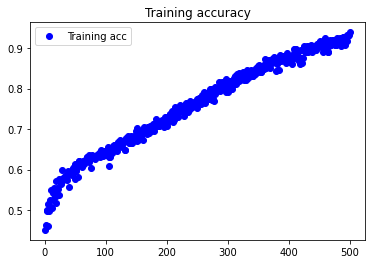

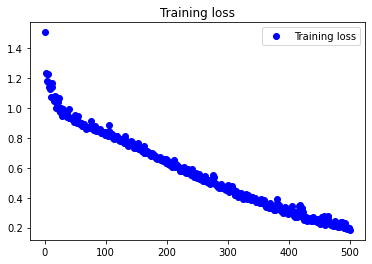

final accuracy 0.9392991065979004


In [105]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

print("final accuracy " + str(acc[-1]))

In [106]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])